# Parental Leave Policies Data
---


<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/win.jpg?raw=True" alt="Drawing" style="width: 600px;"/>



## About Dataset

This dataset contains a csv table with 1,601 records, one for each company

Each record contains the company's name & industry, as well as crowdsourced information on the paid & unpaid weeks off they offer as part of both their maternity & paternity leave policies (when available)

## Aims

This notebook aims to visualize the following aspects of this dataset:

1. Compare the Number of Weeks Between Maternity and Paternity Leave.
2. Rank Company by the highest number of total weeks of paid leave.
3. Rank Company by Number of Weeks for Paid Maternity Leave.
4. Rank Company by Number of Weeks for Paid Paternity Leave.
5. Rank Company by Average Number of Weeks for Paid Leave.


**Link to Dataset:** https://www.kaggle.com/datasets/shilongzhuang/things-we-do-for-family-some-bald-guy

# Libraries
---

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning
---

In [131]:
# Load dataset
df = pd.read_csv('https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/parental_leave.csv?raw=True' , encoding = 'latin1' )

In [132]:
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Epsilon,Advertising,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0,NaN,NaN,NaN,NaN
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0,NaN,NaN,NaN,NaN
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0,NaN,NaN,NaN,NaN
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Choose the first six columns
df = df.iloc[:,:6]
df

,Company,Industry,Paid Maternity Leave,Unpaid Maternity Leave,Paid Paternity Leave,Unpaid Paternity Leave
0,Epsilon,Advertising,6.0,6.0,6.0,6.0
1,The Walt Disney Company,Arts & Entertainment,5.0,4.0,4.5,4.0
2,Guild Education,Business Services: Other,14.0,0.0,8.0,4.0
3,WeWork,Business Services: Other,14.0,2.0,16.0,4.0
4,Randstad USA,Business Services: Staffing & Outsourcing,5.0,7.0,0.0,0.0
...,...,...,...,...,...,...
1596,Xero,Technology: Software,6.0,NaN,NaN,NaN
1597,Fedex Supply Chain,Transportation: Freight & Logistics,2.0,NaN,NaN,NaN
1598,Schneider National,Transportation: Freight & Logistics,0.0,NaN,NaN,NaN
1599,HD Supply,Wholesale,14.0,NaN,NaN,NaN


In [134]:
# Change normalize column names
df.columns = [i.lower().replace(' ','_') for i in df.columns]

In [135]:
# Check null values
df.isnull().sum()

company                      0
industry                     3
paid_maternity_leave         0
unpaid_maternity_leave     107
paid_paternity_leave      1312
unpaid_paternity_leave    1537
dtype: int64

In [136]:
#Check duplicated values
df.duplicated().sum()

0

In [137]:
df.columns

Index(['company', 'industry', 'paid_maternity_leave', 'unpaid_maternity_leave',
       'paid_paternity_leave', 'unpaid_paternity_leave'],
      dtype='object')

In [138]:
#impute null values in paid / unpaid leave with zero
col = ['paid_maternity_leave','unpaid_maternity_leave','paid_paternity_leave', 'unpaid_paternity_leave']
for i in col:
    df[i].fillna(0,inplace = True)

In [139]:
#Calculate total week of for both men and women
df['total_weeks_for_maternity_leave'] = df['paid_maternity_leave'] + df['unpaid_maternity_leave']
df['total_weeks_for_paternity_leave'] = df['paid_paternity_leave'] + df['unpaid_paternity_leave']
df['total_paid_weeks_for_parents'] = df['paid_maternity_leave'] + df['paid_paternity_leave']
df['total_weeks_of_leave_for_both'] = df['total_weeks_for_maternity_leave'] + df['total_weeks_for_paternity_leave']

In [140]:
#Descriptive statistic for all columns
df.iloc[:,2:].describe().T

,count,mean,std,min,25%,50%,75%,max
paid_maternity_leave,1601.0,10.909119,8.024514,0.0,6.0,11.0,12.0,52.0
unpaid_maternity_leave,1601.0,6.185821,9.111204,0.0,0.0,4.0,9.0,52.0
paid_paternity_leave,1601.0,1.323548,4.040297,0.0,0.0,0.0,0.0,51.0
unpaid_paternity_leave,1601.0,0.309182,2.033463,0.0,0.0,0.0,0.0,29.0
total_weeks_for_maternity_leave,1601.0,17.094941,12.637199,0.0,12.0,13.0,20.0,104.0
total_weeks_for_paternity_leave,1601.0,1.632730,4.795834,0.0,0.0,0.0,0.0,51.0
total_paid_weeks_for_parents,1601.0,12.232667,9.644139,0.0,6.0,12.0,15.0,102.0
total_weeks_of_leave_for_both,1601.0,18.727670,13.947866,0.0,12.0,15.0,24.0,153.0


In [141]:
df.iloc[:,2:].median()

paid_maternity_leave               11.0
unpaid_maternity_leave              4.0
paid_paternity_leave                0.0
unpaid_paternity_leave              0.0
total_weeks_for_maternity_leave    13.0
total_weeks_for_paternity_leave     0.0
total_paid_weeks_for_parents       12.0
total_weeks_of_leave_for_both      15.0
dtype: float64

# Visualization

## 1. Comparing Number of Weeks Between Maternity and Paternity Leave
---

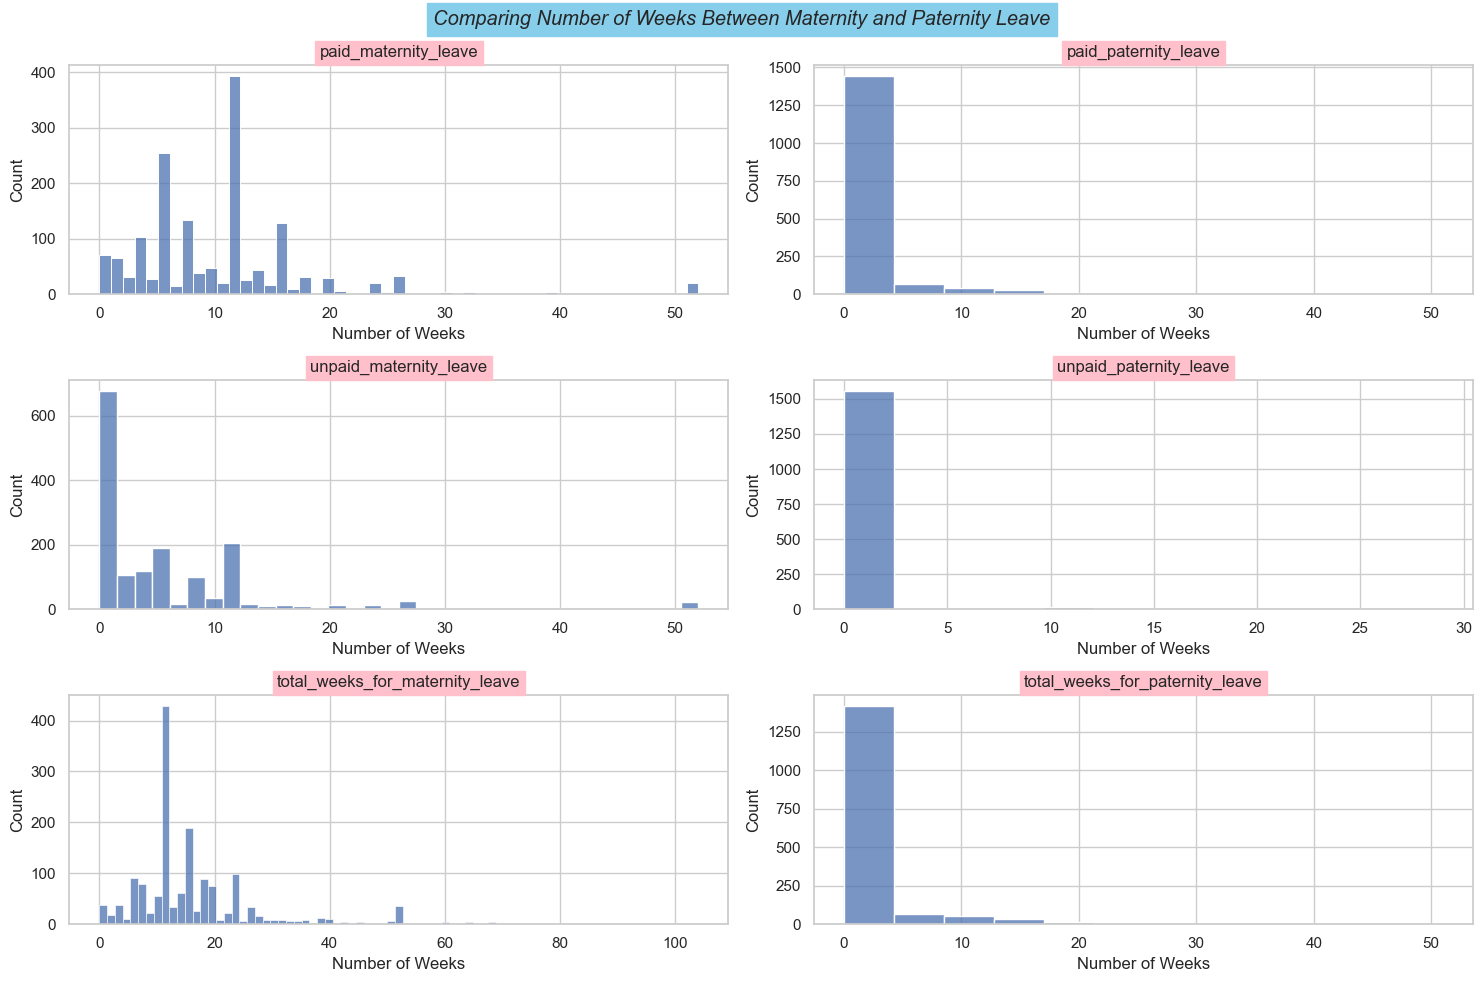

In [142]:
col = ['paid_maternity_leave','paid_paternity_leave', 'unpaid_maternity_leave',
        'unpaid_paternity_leave','total_weeks_for_maternity_leave', 'total_weeks_for_paternity_leave']

fig = plt.figure(figsize = (15,10))
fig.suptitle('Comparing Number of Weeks Between Maternity and Paternity Leave', style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')
for i,j in enumerate(col):
    ax = fig.add_subplot(3,2,i+1)
    ax = sns.histplot(df , x = j , palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic' , backgroundcolor = 'pink', font = 'Arial')
    ax.set_ylabel('Count')
    ax.set_xlabel('Number of Weeks')
    # ax.bar_label(ax.containers[0],label_type='edge')
    # ax.bar_label(ax.containers[1],label_type='edge')
plt.tight_layout()    
plt.show()    

- It seems that there is a huge gap between number of weeks for paid maternity and paternity leave in the USA. The average weeks for paid maternity leave is 11 weeks while the avearege weeks for paternity leave is only 1 week.
- In terms of total number of weeks including paid and unpaid leave which companies permit, paternity leave is still not prevalent in many companies as the average total weeks of paternity leave is only 1.63 week while maternity leave is 16 weeks.

## 2. Ranking Company with highest number of total weeks of paid parental leave.
---

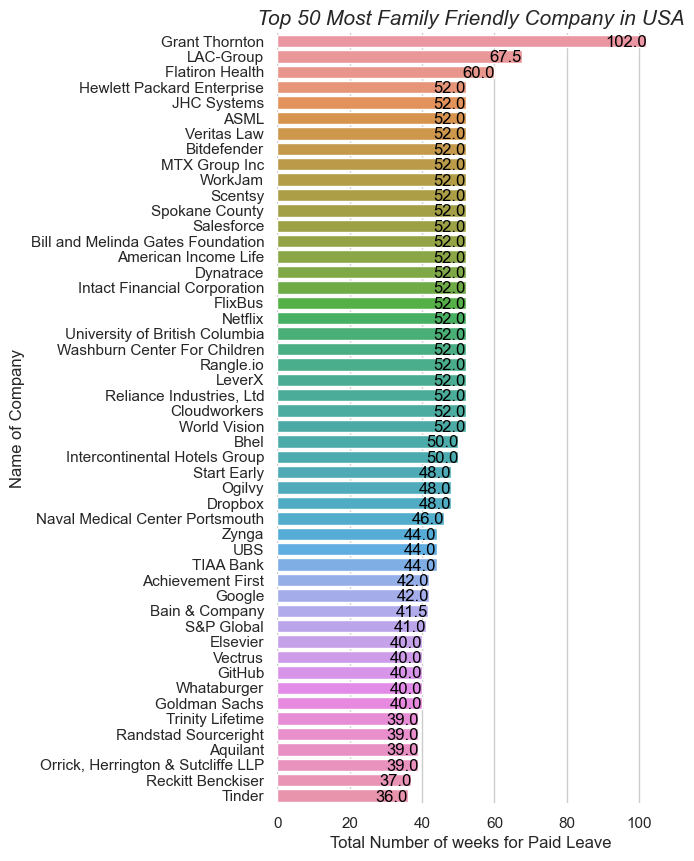

In [143]:
# Ranking Company with highest number of total weeks of paid leave.
df1 = df.sort_values('total_paid_weeks_for_parents' , ascending = False).head(50)
fig = plt.figure(figsize = (5,10))
ax = sns.barplot(data =  df1 , x = 'total_paid_weeks_for_parents' , y = 'company')
ax.set_title('Top 50 Most Family Friendly Company in USA' , fontsize = 15 , style = 'italic')
ax.set_ylabel('Name of Company')
ax.set_xlabel('Total Number of weeks for Paid Leave')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate(df1.total_paid_weeks_for_parents):
    ax.text(j,i,j, color="black", ha="right", va="center_baseline")

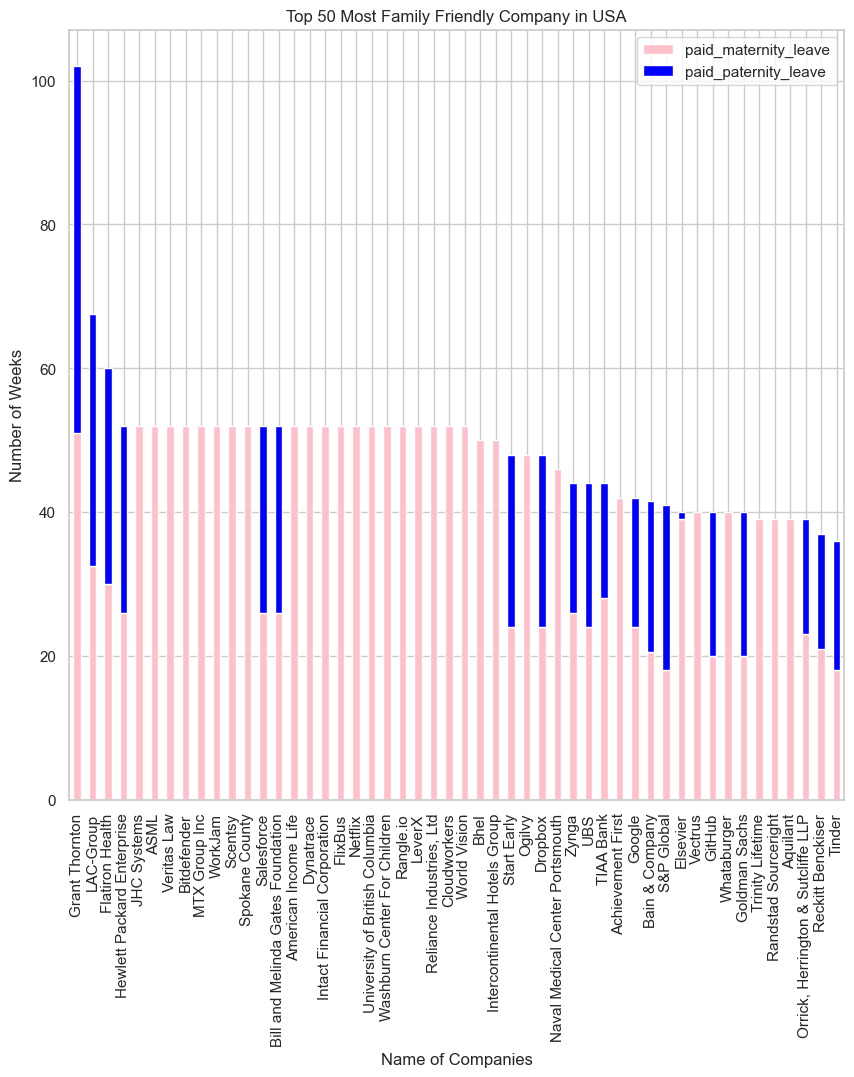

In [144]:
dfx = df[['company','paid_maternity_leave','paid_paternity_leave','total_paid_weeks_for_parents']].sort_values('total_paid_weeks_for_parents', ascending = False)
dfx = dfx.set_index('company').head(50)
dfx = dfx[['paid_maternity_leave','paid_paternity_leave']]

ax = dfx.plot(kind = 'bar' , stacked = True , color = ['pink','blue'] , figsize = (10,10))
plt.title('Top 50 Most Family Friendly Company in USA')
plt.ylabel('Number of Weeks')
plt.xlabel('Name of Companies')
plt.xticks(rotation=90);

## 3. Ranking Companies by Number of Weeks for Paid Maternity Leave.
---

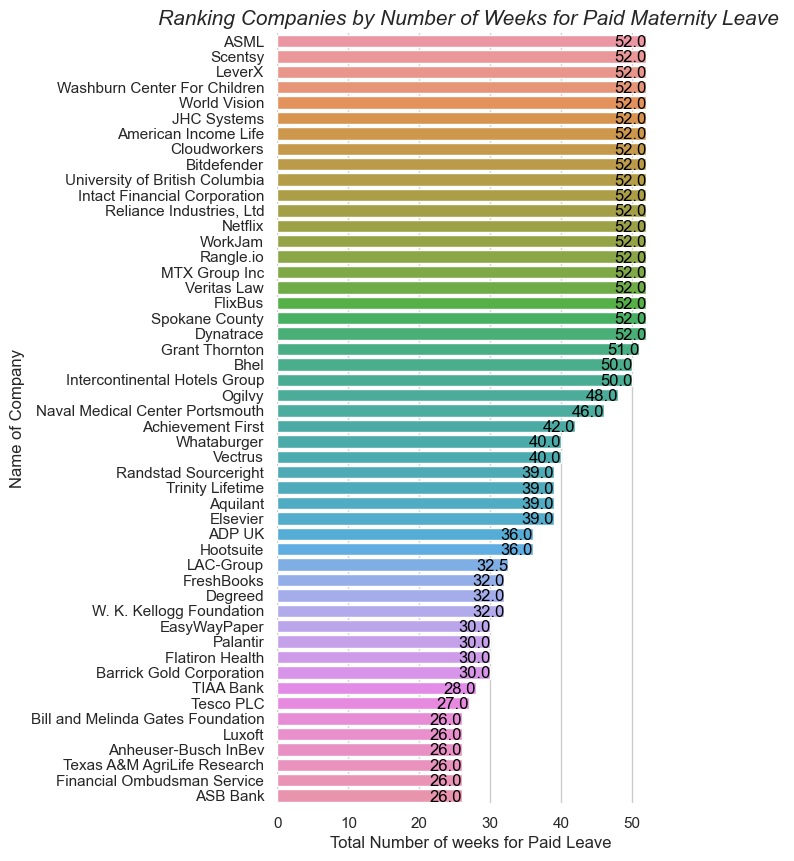

In [145]:
# Top 50 higest number of weeks for paid leave

df2 = df.sort_values('paid_maternity_leave' , ascending = False).head(50)
fig = plt.figure(figsize = (5,10))
ax = sns.barplot(data =  df2 , x = 'paid_maternity_leave' , y = 'company')
ax.set_title('Ranking Companies by Number of Weeks for Paid Maternity Leave ' , fontsize = 15 , style = 'italic')
ax.set_ylabel('Name of Company')
ax.set_xlabel('Total Number of weeks for Paid Leave')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate(df2.paid_maternity_leave):
    ax.text(j,i,j, color="black", ha="right", va="center_baseline")

## 4. Ranking Companies by Number of Weeks for Paid Paternity Leave.
---

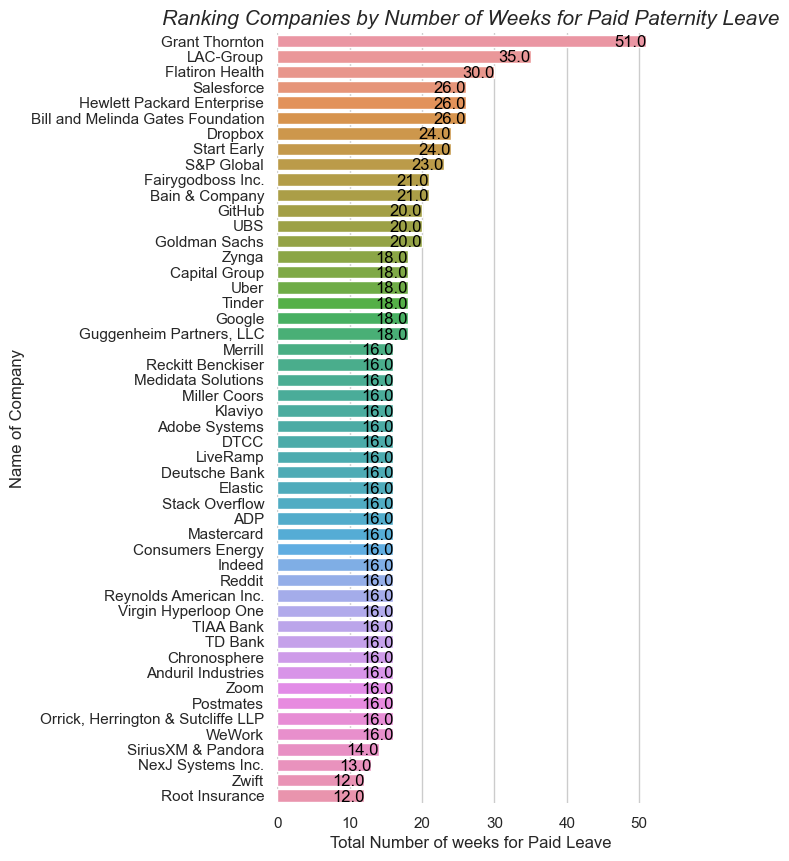

In [146]:
df3 = df.sort_values('paid_paternity_leave' , ascending = False).head(50)
fig = plt.figure(figsize = (5,10))
ax = sns.barplot(data =  df3 , x = 'paid_paternity_leave' , y = 'company')
ax.set_title('Ranking Companies by Number of Weeks for Paid Paternity Leave' , fontsize = 15 , style = 'italic')
ax.set_ylabel('Name of Company')
ax.set_xlabel('Total Number of weeks for Paid Leave')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate(df3.paid_paternity_leave):
    ax.text(j,i,j, color="black", ha="right", va="center_baseline")

## 5. Ranking Industries by Average Number of Weeks for Paid Parental Leave.
---

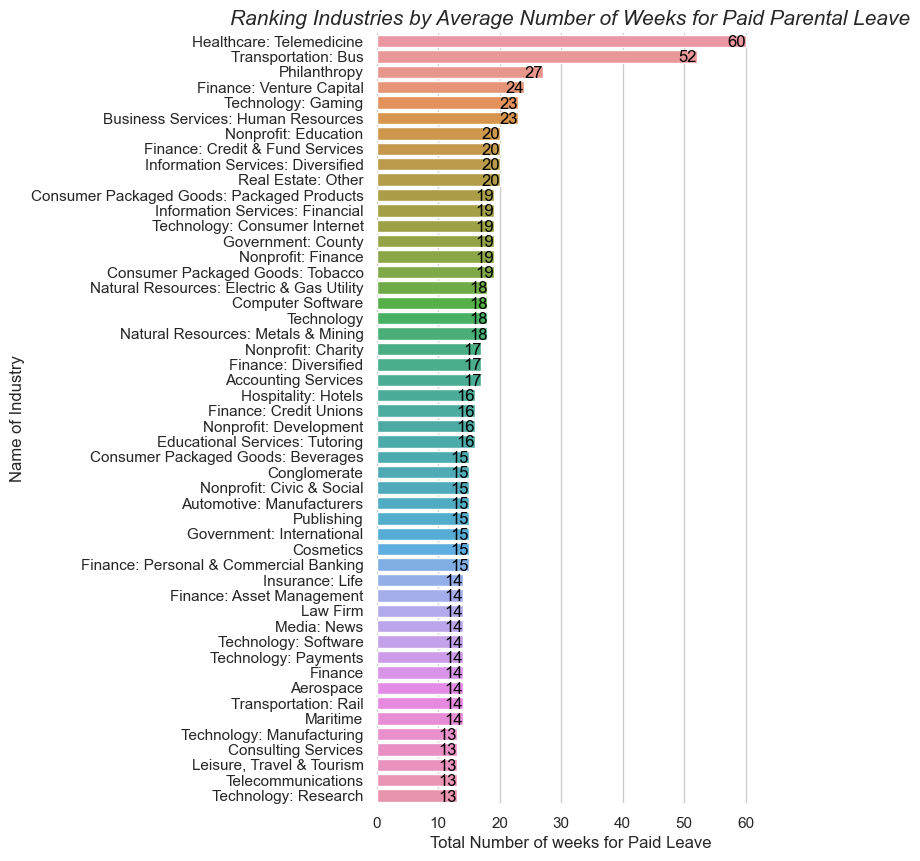

In [148]:
ind = df.groupby('industry',as_index = False).mean().sort_values('total_paid_weeks_for_parents', ascending = False).head(50)
ind = ind[['industry','total_paid_weeks_for_parents']]
ind['total_paid_weeks_for_parents'] = ind['total_paid_weeks_for_parents'].astype('int32')

df4 = ind
fig = plt.figure(figsize = (5,10))
ax = sns.barplot(data =  df4 , x = 'total_paid_weeks_for_parents' , y = 'industry')
ax.set_title('Ranking Industries by Average Number of Weeks for Paid Parental Leave' , fontsize = 15 , style = 'italic')
ax.set_ylabel('Name of Industry')
ax.set_xlabel('Total Number of weeks for Paid Leave')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for i,j in enumerate(df4.total_paid_weeks_for_parents):
    ax.text(j,i,j, color="black", ha="right", va="center_baseline")